Трехмерные графики включаются модулем `mplot3d`, который уже включён в поставку Matplotlib:

In [1]:
from mpl_toolkits import mplot3d

После импорта `mplot3d`, трехмерные оси могут быть созданы с помощью аргумента `projection='3d'` при любом обычном создании осей:

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

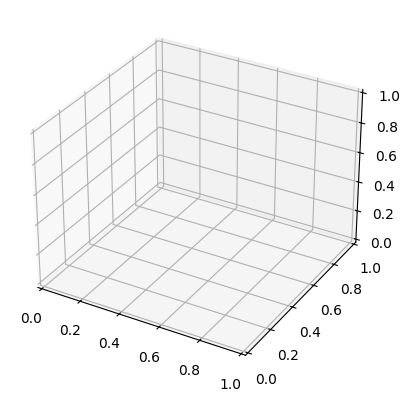

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Трехмерные точки и линии

Построение тригонометрической спирали, а также произвольных точек около этой спирали:

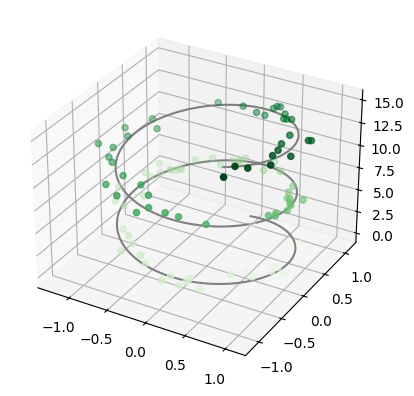

In [8]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

По умолчанию прозрачность изменена, чтобы создать ощущение глубины изображения.

# Трехмерные контурные графики

Примерно как и для двумерного `ax.contour`, `ax.contour3D` требует чтобы входные данные были в форме двумерных регулярных сеток, с вычисленным значением по оси Z для каждой точки. Далее мы покажем трехмерную контурную диаграмму для трехмерной синусоидальной функции:

In [10]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

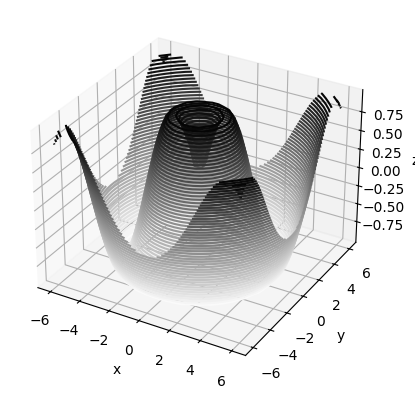

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Иногда угол зрения может быть не очень удобный, в этом случае можно использовать метод `view_init`, чтобы установить углы возвышения и азимута. В следующем примере вы будем использовать угол возвышения в 60 градусов (выше плоскости x-y) и азимут 35 градусов (поворот на 35 градусов против часовой стрелки вокруг оси z):

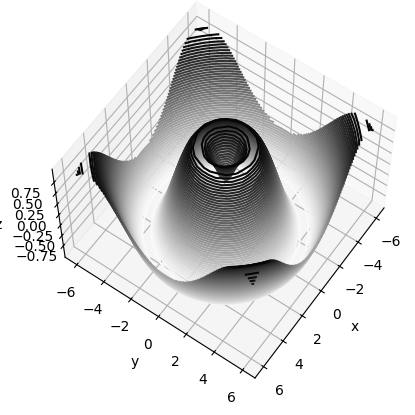

In [14]:
ax.view_init(60, 35)
fig

# Каркасы и поверхностные графики

Два других типа трехмерных данных, которые работают на данных с привязкой к координатам - это каркасы и поверхностные графики. Они принимают сетку значений и проецируют ее на указанную трехмерную поверхность и могут создать результурующаую трехмерную форму, достаточно легкую для визуализации. Далее пример использования каркасов:

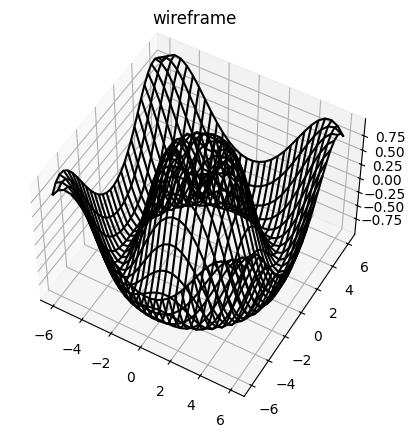

In [27]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe')
ax.view_init(50)

Поверхностные графики похоже на каркасы, но каждый элемент заполнен полигоном. Добавление цветовой карты позволяет помочь с восприятием топологии отображаемой поверхности:

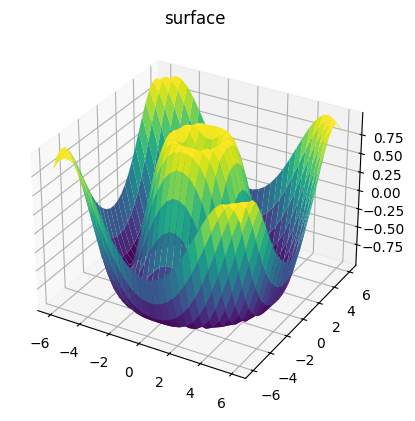

In [29]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('surface');

Пример использования частично полярной сетки с разрезом:

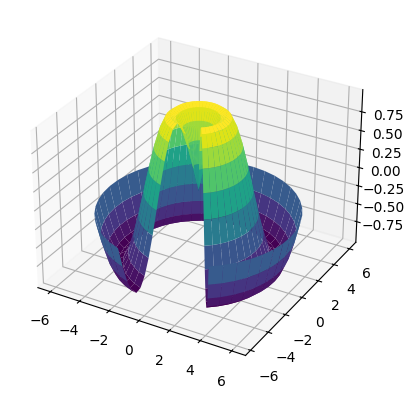

In [32]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40) 
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none');

# Триангуляция поверхностей

В некоторых случаях, где нет равномерно распределенных данных, могут быть более удобны графики, основанные на координатной сетке из треугольников. Такое особенно полезно когда мы имеем дело со случайно выбранными значениями.

In [33]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

Нарисуем диаграмму рассеяния точек:

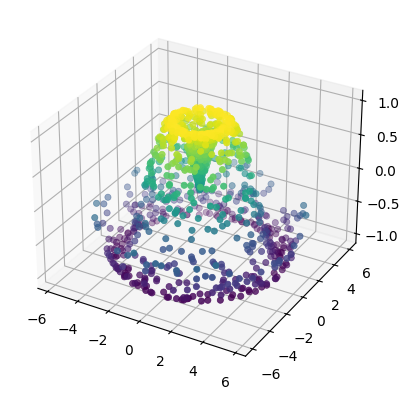

In [35]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

Для улучшения графика нам поможет функция `ax.plot_trisurf`:

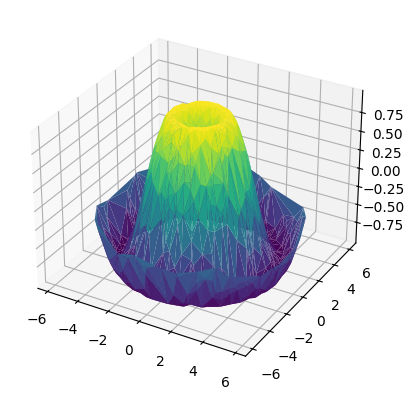

In [37]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none');

## Пример: визуализация ленты Мёбиуса

Нам понадобятся два параметра. $θ$, который изменяется от $0$ до $2\pi$ по кругу, а второй $w$, который изменяется от $-1$ на одном краю ленты (по ширине), до $1$ на другом:

In [38]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

Для построения ленты Мёбиуса происходят два вращательных движения: одно - изменение расположения кольца относительно его центра (координата, которую мы назвали $θ$, а второе - скручивание полоскиотносительно ее оси координат (назовём эту координату $ϕ$). Чтобы получилась лента Мёбиуса, полоска должна выполнить половину скручивания за время полного сворачивания в кольцо, т.е. $Δϕ=Δθ/2$:

In [39]:
phi = 0.5 * theta

Теперь вспомним тригонометрию. Определим переменную $r$ - расстояние каждой точки от центра и воспользуемся ею для нахождения внутренних координат $(x, y, z)$:

In [40]:
# radius in x-y plane
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

Чтобы построить ленту нужно убедиться, что триангуляция выполнена правильно. Лучший способ сделать это - описать триангуляцию в координатах базовой параметризации, после чего позволить Matplotlib выполнить проекцию полученной триангуляции в трехмерное пространство ленты Мёбиуса:

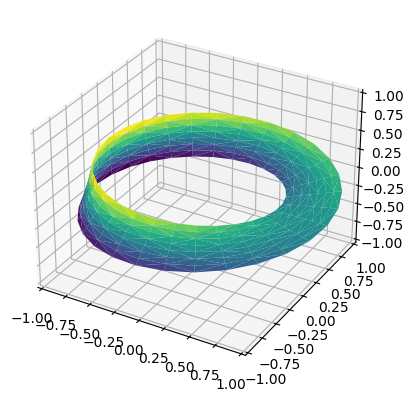

In [41]:
# triangulate in the underlying parametrization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap='viridis', linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);